# Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


# Step 1: Importing Data 

In [2]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Checking for Null values

round(lead.isnull().sum()/lead.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

Clearly, a lot of columns have a high percentage of missing values and are not useful for our analysis. We will drop columns that have high null values and also the ones that are irrelevant for our analysis.

In [6]:
lead.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Profile Score', 'Lead Quality', 'Tags', 'How did you hear about X Education'],axis=1 , inplace=True)

In [7]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [8]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

#### We will also drop the City and Country variables as they won't be useful for our analysis. It is better to drop them 

In [9]:
lead.drop(['City','Country'], axis=1, inplace=True)

In [10]:
# Lets check the percentage of missing values again

round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Select,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Select,No,No,Modified


There are a few columns where there is an option "Select" meaning the user did not give their input or data. We need to identify and check for this in every column and if the value count is high , we will treat it as missing values and drop that particular column.

In [12]:
# Checking the value counts of all the columns 
for column in lead:
    print(lead[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The are 2 Columns that are identified namely Lead Profile and Specialization. 

In [13]:
lead['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [14]:
lead['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Since Lead Profile has a high number of rows where the user did not give input or in other words high number of "Select", it is better to drop it.

In [15]:
lead.drop(["Lead Profile"], axis=1, inplace=True)

#### Certain columns like Do Not Call, Search, Recieve More Updates About our Courses, Get Updates on DM Content etc has a very high number of No's as compared to Yes ,It's better to drop them as they won't help with our analysis.


In [16]:
lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [17]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Also, there is a high imbalance in the variable What matters most to you in choosing a course. The option Better Career Prospects occurs 6528 while the other two appear once or twice at max. So we will drop this column as well. 

In [18]:
lead.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [19]:
# Checking the null values again 

round(100*(lead.isnull().sum()/len(lead.index)),2)


Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

There are still 2 Columns with a high percentage of null values , but we won't drop them as they could be significantly useful for the analysis. We will instead drop the null rows in the column

In [20]:
lead = lead[~pd.isnull(lead['What is your current occupation' ])]

In [21]:
lead.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

We will do the same process for the remaining rows in the columns with null values 

In [22]:
# Drop the null values rows in the column 'Lead Source'

lead = lead[~pd.isnull(lead['Lead Source'])]

In [23]:
lead.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               123
Total Time Spent on Website                 0
Page Views Per Visit                      123
Last Activity                             101
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [24]:
# Drop the null value rows in the column 'TotalVisits'

lead = lead[~pd.isnull(lead['TotalVisits'])]

In [25]:
lead.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [26]:
# Drop the null values rows in the column 'Specialization'

lead = lead[~pd.isnull(lead['Specialization'])]

In [27]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

There are no Null Values now. We will check the percentage of row that we've retained 

In [28]:
#Checking for the percentage of the rows retained

print(len(lead.index))
print(len(lead.index)/9240)

6373
0.6897186147186147


We have retained 68% of the rows which is good

Finally we will drop Prospect ID and Lead Number since they are not predictor variables and won't be useful for our analysis. 

In [29]:
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [30]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# Preparing the Data 

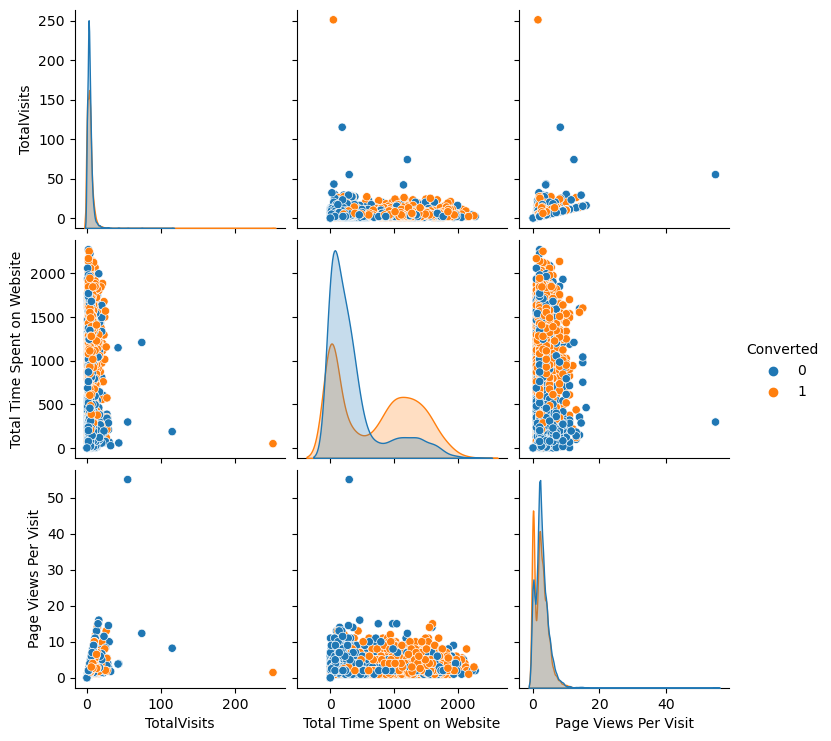

In [31]:
sns.pairplot(lead, hue="Converted")
plt.show()

## Creating Dummy Variables

We need to deal with the categorical variables in the dataset in order to progress hence we need to find out the categorical variables 

In [32]:
#Checking for the columns that are the type "object"

cat_vars = lead.loc[:, lead.dtypes == 'object']
cat_vars.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [33]:
# Creating Dummy Variables 

dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)



In [34]:
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
# Adding dummies to the Lead Dataframe

lead = pd.concat([lead, dummy], axis=1)

In [36]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [37]:
# Creating dummy variables separately for the variable 'Specialization' since it has the option 'Select' which is not useful hence
# we will drop that column and add a prefix to the rest of the generated columns 

dummy_spl = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
xleads = pd.concat([lead, dummy_spl], axis = 1)

In [38]:
# Dropping the variables for which we have already created Dummy variables 

lead = lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis= 1)

In [39]:
# Taking a look at the dataset again

lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Creating a Train-Test Split 

In [40]:
# Importing necessary libraries 

from sklearn.model_selection import train_test_split

In [41]:
# Putting all the feature variables in X

X = lead.drop(["Converted"], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
# Putting the target variable in y

y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [43]:
# Creating the train test split by splitting the data into 70% and 30%

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling 

We need to scale the variables in the dataset which have different scales. 

In [44]:
# Importing necessary libraries

from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]= scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [46]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Looking at the Correlation 

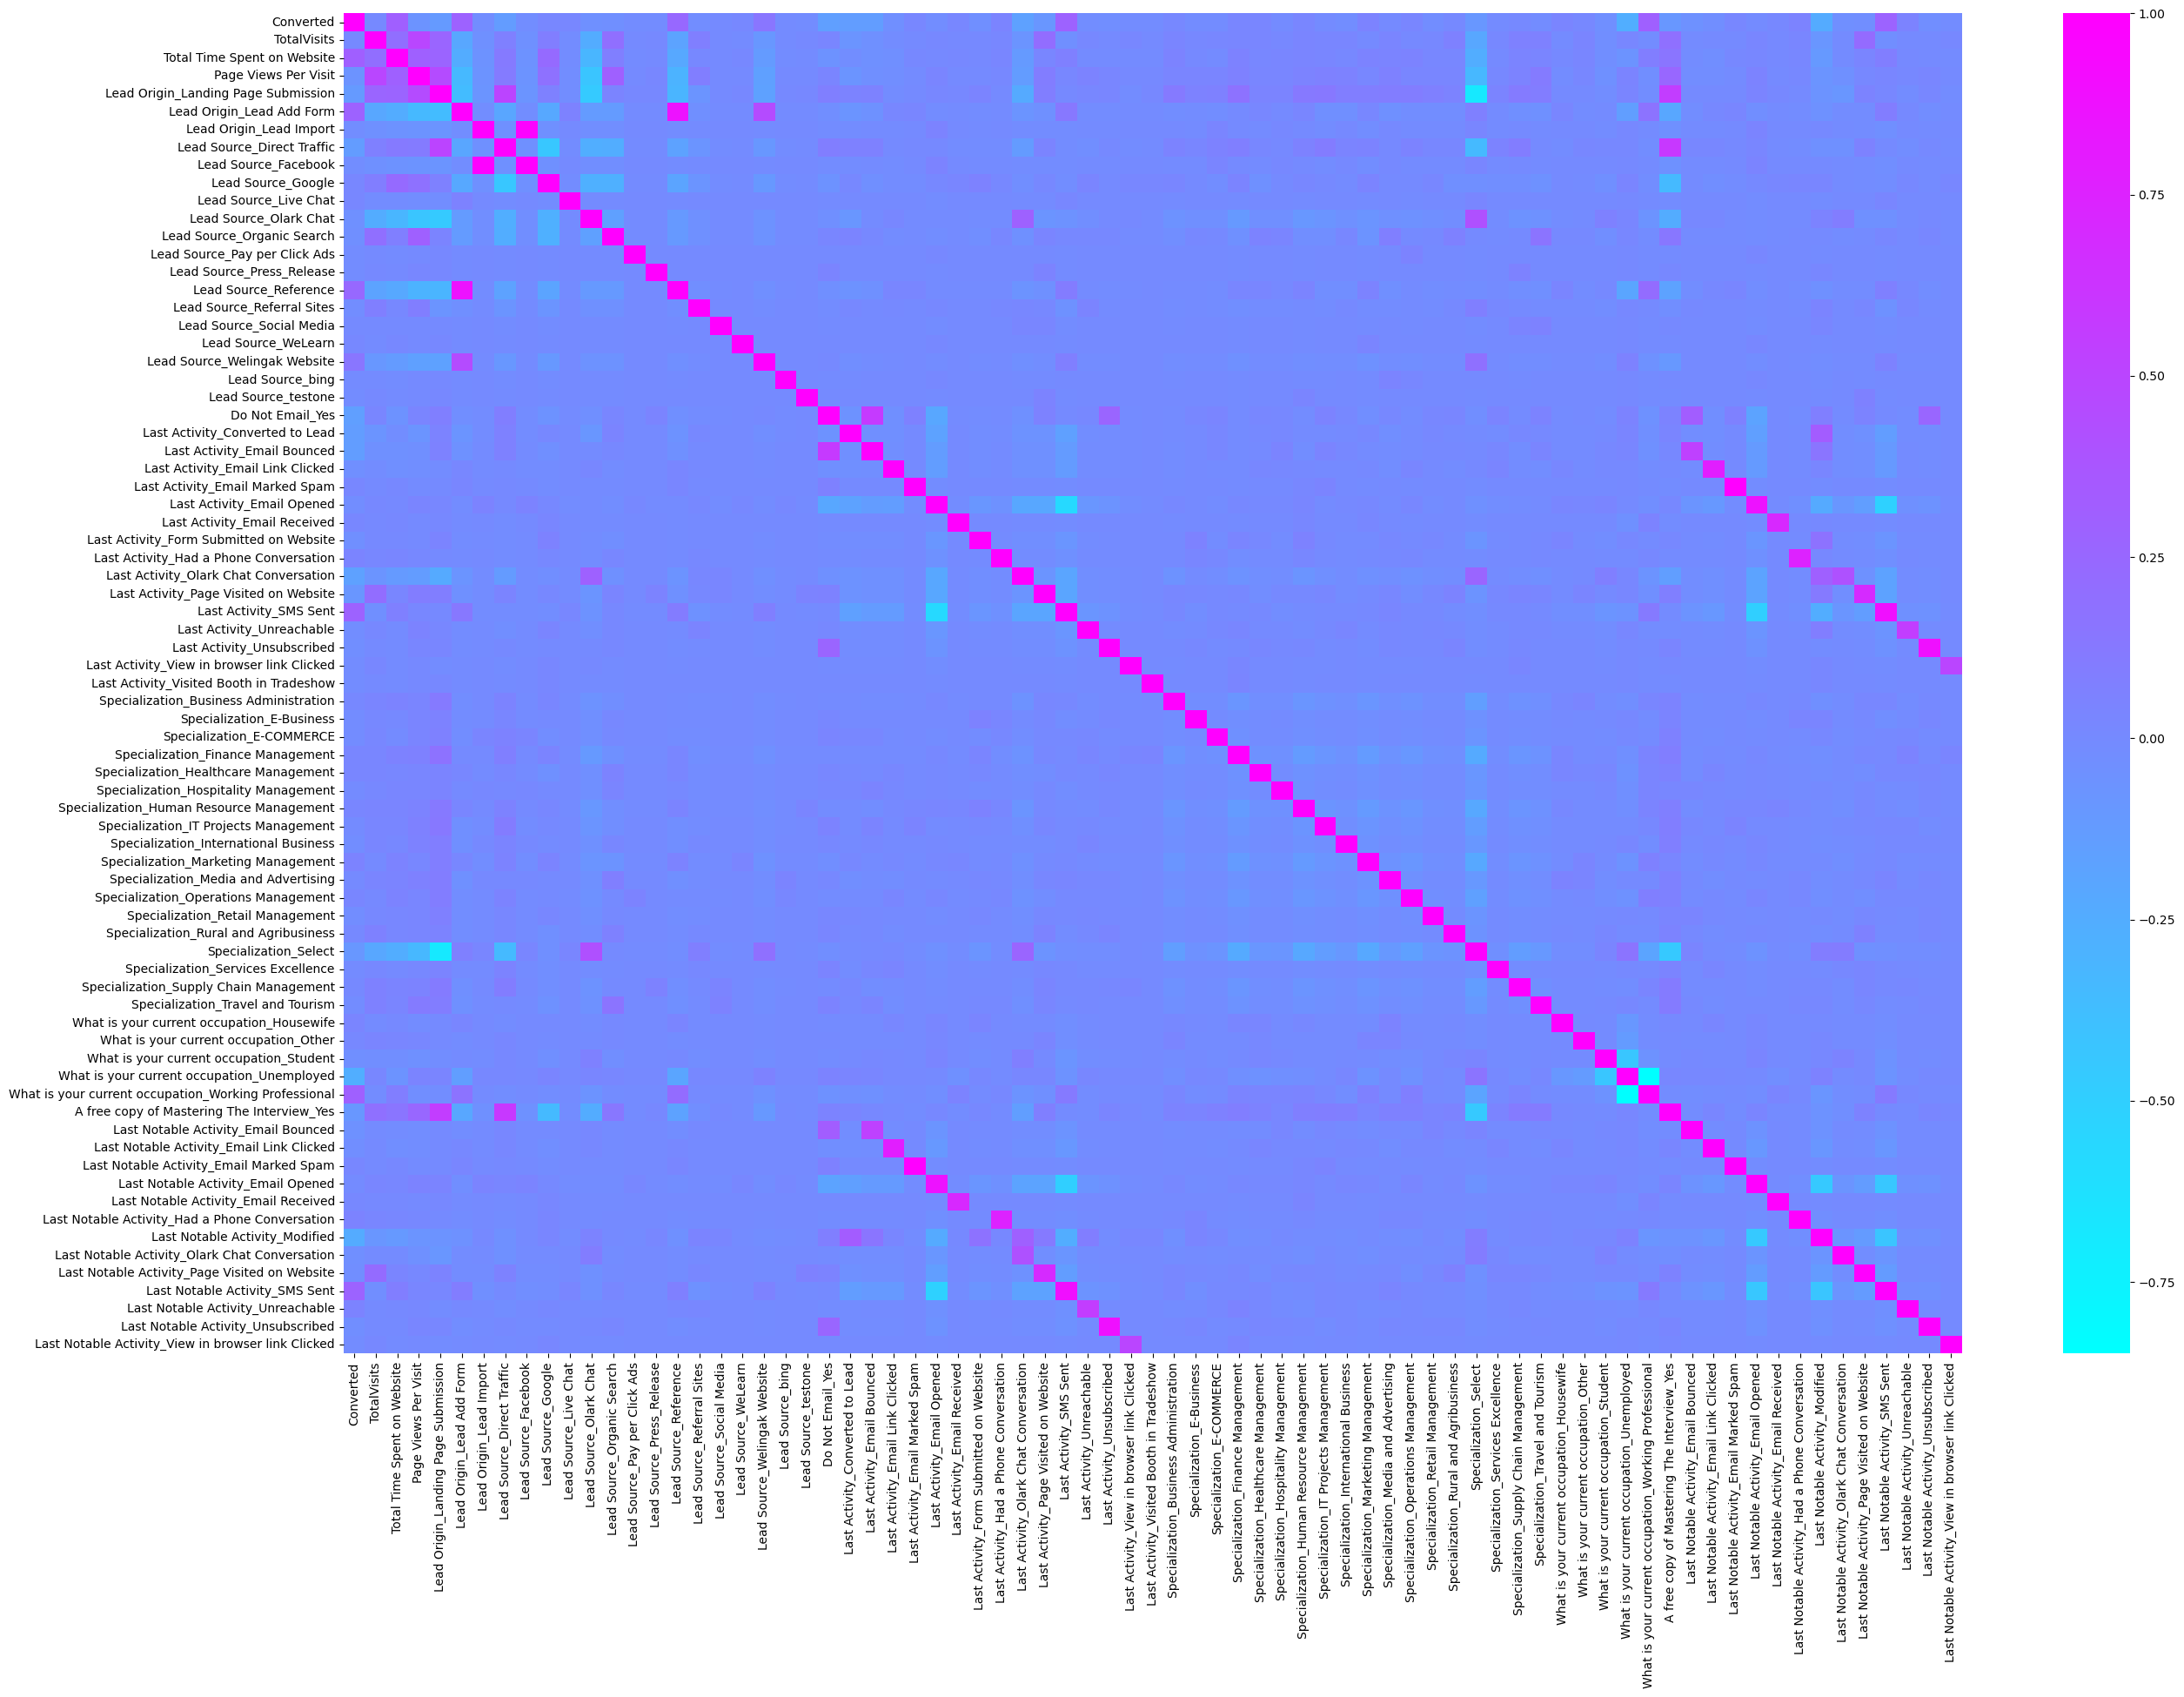

In [47]:
plt.figure(figsize =(30,20))
sns.heatmap(lead.corr(), cmap= 'cool')
plt.show()

# Model Building 

In [48]:
# importing necessary libraries for Model Building 

from sklearn.linear_model import LogisticRegression

In [49]:
logreg = LogisticRegression()

In [50]:
# Importing RFE and selecting 15 variables 

from sklearn.feature_selection import RFE 

rfe= RFE(logreg, n_features_to_select=15)
rfe= rfe.fit(X_train, y_train)

In [51]:
# Taking a look at the features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 20),
 ('Lead Source_testone', False, 30),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link 

In [52]:
# Putting all the selected columns in a variable

cols = X_train.columns[rfe.support_]

In [53]:
# Selecting only the columns selected by RFE 
X_train = X_train[cols]


In [54]:
# Importing statsmodels

import statsmodels.api as sm 

In [55]:
# Fitting a Logistic Regression model on X_train and adding a constant

X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Tue, 23 May 2023   Deviance:                       4134.4
Time:                        21:21:41   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
========================================================================================================================
"""

There are a few variables that have a P-value which is significantly high and we need to deal with them but before that we will take a look at the VIFs

In [56]:
# Importing variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.13
6,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.39
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


VIF values seem to be fine but as noticed, the P values of some variables are to be dealt with. So we will first drop "What is your current occuptation_Housewife"

In [58]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [59]:
# Refitting the model 

logm1= sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.3
Date:                Tue, 23 May 2023   Deviance:                       4138.7
Time:                        21:21:41   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3670
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4012      0.556     -0.722      0.471      -1.491       0.688
TotalVisits                                             10.0436      2.622      3.831      0.000       4.905      15.183
Total Time Spent on Website                              4.4024      0.186     23.732      0.000       4.039       4.766
Lead Origin_Lead Add Form                                4.2339      0.259     16.361      0.000       3.727       4.741
Lead Source_Olark Chat                                   1.6284      0.133     12.245      0.000       1.368       1.889
Lead Source_Welingak Website                             2.3438      1.038      2.258      0.024       0.309       4.379
Do Not Email_Yes                                        -1.5202      0.193     -7.896      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   1.1722      0.987      1.187      0.235      -0.763       3.107
Last Activity_SMS Sent                                   1.1784      0.082     14.303      0.000       1.017       1.340
Specialization_Select                                   -0.3417      0.098     -3.480      0.001      -0.534      -0.149
What is your current occupation_Student                 -1.6691      0.591     -2.824      0.005      -2.828      -0.511
What is your current occupation_Unemployed              -1.8397      0.552     -3.332      0.001      -2.922      -0.758
What is your current occupation_Working Professional     0.7049      0.583      1.209      0.227      -0.438       1.848
Last Notable Activity_Had a Phone Conversation          22.0112   1.27e+04      0.002      0.999   -2.48e+04    2.49e+04
Last Notable Activity_Unreachable                        2.7635      0.807      3.423      0.001       1.181       4.346
========================================================================================================================
"""

The variable "Last Notable Activity_Had a Phone Conversation" also need to be dropped.

In [60]:
X_train.drop("Last Notable Activity_Had a Phone Conversation", axis= 1, inplace=True)

In [61]:
# Refitting the model 

logm1= sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.0
Date:                Tue, 23 May 2023   Deviance:                       4143.9
Time:                        21:21:41   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4009      0.556     -0.721      0.471      -1.491       0.689
TotalVisits                                             10.1186      2.624      3.856      0.000       4.975      15.262
Total Time Spent on Website                              4.3951      0.185     23.707      0.000       4.032       4.758
Lead Origin_Lead Add Form                                4.2345      0.259     16.363      0.000       3.727       4.742
Lead Source_Olark Chat                                   1.6319      0.133     12.268      0.000       1.371       1.893
Lead Source_Welingak Website                             2.3476      1.038      2.261      0.024       0.313       4.382
Do Not Email_Yes                                        -1.5207      0.192     -7.901      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   2.7626      0.800      3.454      0.001       1.195       4.330
Last Activity_SMS Sent                                   1.1783      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3488      0.098     -3.553      0.000      -0.541      -0.156
What is your current occupation_Student                 -1.6673      0.591     -2.821      0.005      -2.826      -0.509
What is your current occupation_Unemployed              -1.8376      0.552     -3.329      0.001      -2.920      -0.756
What is your current occupation_Working Professional     0.7040      0.583      1.208      0.227      -0.439       1.847
Last Notable Activity_Unreachable                        2.7623      0.807      3.422      0.001       1.180       4.345
========================================================================================================================
"""

In [62]:
# Dropping What is your current occupation_Working Professional

X_train.drop('What is your current occupation_Working Professional', axis=1, inplace=True)

In [64]:
# Refitting the model 

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Tue, 23 May 2023   Deviance:                       4145.3
Time:                        21:22:43   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2371      0.196      1.211      0.226      -0.147       0.621
TotalVisits                                   10.0121      2.618      3.825      0.000       4.882      15.143
Total Time Spent on Website                    4.3957      0.185     23.708      0.000       4.032       4.759
Lead Origin_Lead Add Form                      4.2341      0.259     16.364      0.000       3.727       4.741
Lead Source_Olark Chat                         1.6321      0.133     12.275      0.000       1.371       1.893
Lead Source_Welingak Website                   2.3468      1.038      2.260      0.024       0.312       4.382
Do Not Email_Yes                              -1.5182      0.192     -7.891      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation         2.7664      0.800      3.459      0.001       1.199       4.334
Last Activity_SMS Sent                         1.1815      0.082     14.361      0.000       1.020       1.343
Specialization_Select                         -0.3500      0.098     -3.565      0.000      -0.542      -0.158
What is your current occupation_Student       -2.3044      0.283     -8.155      0.000      -2.858      -1.751
What is your current occupation_Unemployed    -2.4751      0.187    -13.230      0.000      -2.842      -2.108
Last Notable Activity_Unreachable              2.7631      0.807      3.422      0.001       1.181       4.346
==============================================================================================================
"""

All the P-values seem to be in the appropriate range now

# Model Evaluation 

The P-values and VIFs are all in the appropriate range for all the variables. The next step would be making predictions using the final model that we created

In [65]:
# Using 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.317060
218     0.152306
4171    0.136140
4037    0.277702
3660    0.959984
207     0.155001
2044    0.143021
6411    0.949236
6498    0.080049
2085    0.981888
dtype: float64

In [66]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31706043, 0.15230642, 0.13613956, 0.27770195, 0.95998364,
       0.1550006 , 0.14302095, 0.94923559, 0.08004927, 0.98188829])

## Creating a Dataframe

In [67]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.317060
1,0,0.152306
2,1,0.136140
3,1,0.277702
4,1,0.959984


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [68]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.317060,0
1,0,0.152306,0
2,1,0.136140,0
3,1,0.277702,0
4,1,0.959984,1


Since we have ascertained the probabilities and have made conversion predictions using them, we can go ahead and evaluate the model

In [69]:
# Importing the necessary libraries

In [70]:
from sklearn import metrics

### Creating a Confusion Matrix

In [71]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [72]:
print(confusion)

[[1925  387]
 [ 562 1587]]


#### Checking the overall accuracy 

In [74]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7872674288276171


##### The overall accuracy is 78% which is good enough 

In [75]:
# Evaluating other metrics

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Calculating the sensitivity

TP/(TP+FN)

0.7384830153559795

In [77]:
# Calculating the specificity

TN/(TN+FP)

0.8326124567474048

### Finding the Optimal Cutoff 

In [78]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

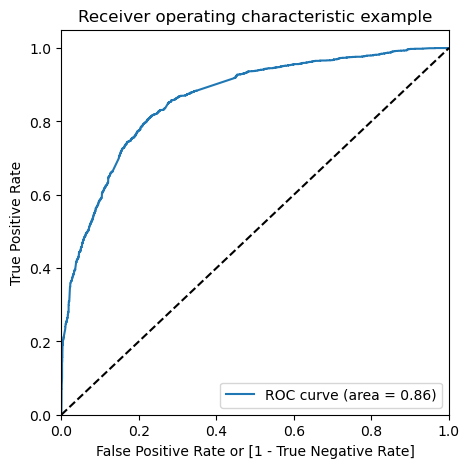

In [80]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the Curve of the ROC is 0.86 which is good enough and it also implies that we have a good model.

In [81]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1


In [82]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.538444  0.993020  0.115917
0.2   0.2  0.695584  0.944625  0.464100
0.3   0.3  0.768662  0.875756  0.669118
0.4   0.4  0.790406  0.810610  0.771626
0.5   0.5  0.787267  0.738483  0.832612
0.6   0.6  0.761937  0.635644  0.879325
0.7   0.7  0.738624  0.548627  0.915225
0.8   0.8  0.708361  0.447650  0.950692
0.9   0.9  0.644250  0.281061  0.981834


In [83]:
# Plotting the above dataframe

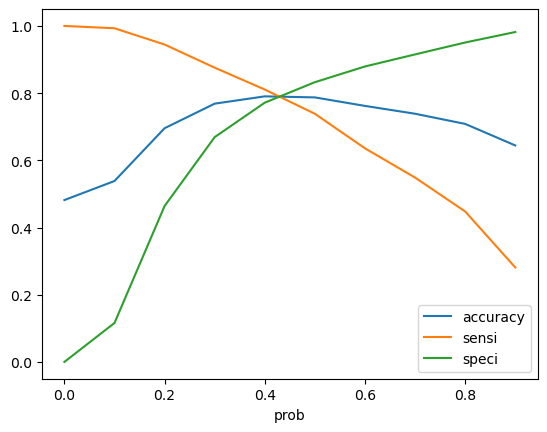

In [84]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the figure above, the optimal value or the Cutoff is about 0.42. Hence we will choose it as our Cutoff 

In [85]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1,1


In [86]:
# Checking the accuracy again 

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [87]:
# Checking the confusion matrix again 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1810,  502],
       [ 437, 1712]], dtype=int64)

In [88]:
# Calculating Sensitivity

TP/(TP+FN)

0.7384830153559795

In [89]:
# Calculating Specificity

TN/(TN+FP)

0.8326124567474048

The Cutoff Point seems good 

# Making Predictions on the Test Set

In [91]:
#Scaling the test set 
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
X_test = X_test[cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0


In [94]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[cols])

In [95]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,1,0,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,1,0,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,1,0,1,0,0,0,1,0,0,0


In [97]:
# Dropping Columns from X_test as well 

X_test.drop(['What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [99]:
# Making Predictions on the Test Set

y_test_pred = res.predict(sm.add_constant(X_test))


In [100]:
y_test_pred[:10]

4771    0.996504
6122    0.138112
9202    0.718136
6570    0.312323
2668    0.731056
4233    0.822362
3368    0.643642
9091    0.477191
5972    0.301264
3631    0.796722
dtype: float64

In [101]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
y_pred_1.head()

,0
4771,0.996504
6122,0.138112
9202,0.718136
6570,0.312323
2668,0.731056


In [103]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [104]:
# Removing index for both dataframes and appending them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
y_pred_final.head()

,Converted,0
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [107]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [108]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [109]:
# Making predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [110]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996504,1
1,0,0.138112,0
2,0,0.718136,1
3,1,0.312323,0
4,1,0.731056,1


In [111]:
# checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7855648535564853

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[780, 216],
       [194, 722]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Calculating sensitivity
TP / float(TP+FN)

0.7882096069868996

In [115]:
# Calculating specificity
TN / float(TN+FP)

0.7831325301204819

## Precision-Recall View

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1925,  387],
       [ 562, 1587]], dtype=int64)

Precision 

TP/TP+ FP


In [117]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8039513677811551

Recall

TP / TP + FN

In [118]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7384830153559795

### Precision and recall tradeoff

In [119]:
from sklearn.metrics import precision_recall_curve

In [120]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [121]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

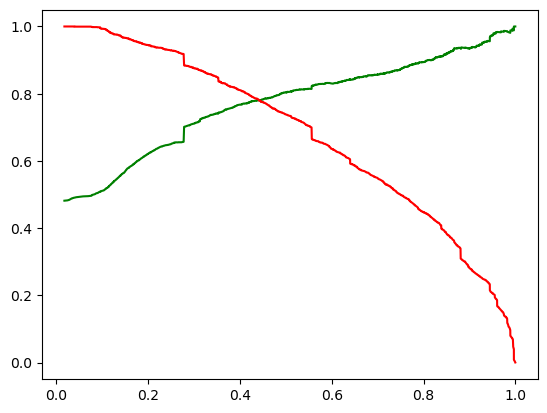

In [122]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [123]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.317060,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.152306,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.136140,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.277702,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959984,1,1,1,1,1,1,1,1,1,1,1,1


In [124]:
# checking the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [125]:
# creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1839,  473],
       [ 466, 1683]], dtype=int64)

In [126]:
# Evaluating the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Calculating Precision

TP/(TP+FP)

0.7806122448979592

In [128]:
# Calculating Recall

TP/(TP+FN)

0.7831549557933922

The Cutoff point seems good 

## Making Predictions on the Test Set



In [129]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [130]:
y_test_pred[:10]

4771    0.996504
6122    0.138112
9202    0.718136
6570    0.312323
2668    0.731056
4233    0.822362
3368    0.643642
9091    0.477191
5972    0.301264
3631    0.796722
dtype: float64

In [131]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [132]:
y_pred_1.head()

,0
4771,0.996504
6122,0.138112
9202,0.718136
6570,0.312323
2668,0.731056


In [133]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [134]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [135]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [136]:
y_pred_final.head()

,Converted,0
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [137]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [138]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996504
1,0,0.138112
2,0,0.718136
3,1,0.312323
4,1,0.731056


In [143]:
# Making predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [144]:
# Checking y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996504,1
1,0,0.138112,0
2,0,0.718136,1
3,1,0.312323,0
4,1,0.731056,1


In [145]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7897489539748954

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[799, 197],
       [205, 711]], dtype=int64)

In [147]:
# Calculate Precision

TP/(TP+FP)

0.7806122448979592

In [148]:
# Calculate Recall

TP/(TP+FN)

0.7831549557933922

# Conclusion

In the initial stage, there is a large number of leads generated, but only a small fraction of them actually become paying customers. To increase lead conversion, it is important to effectively nurture potential leads during the middle stage. This involves educating them about the product, maintaining constant communication, and building a relationship.

To prioritize the most promising prospects among the generated leads, you should analyze variables such as 'TotalVisits,' 'Total Time Spent on Website,' and 'Page Views Per Visit.' These factors play a significant role in determining the likelihood of lead conversion.

It is crucial to maintain a comprehensive list of leads to keep them informed about new courses, services, job opportunities, and future educational prospects. By closely monitoring each lead, you can personalize the information you send to them. Tailoring job offerings, information, and courses based on the specific interests of the leads will greatly enhance the chances of capturing them as potential customers.

Give special attention to converted leads. Engage in question-answer sessions with them to gather the necessary information. Conduct further inquiries and schedule appointments to understand their intentions and mindset regarding joining online courses. This approach will help you gain valuable insights and tailor your offerings to meet their needs effectively.